# Sentiment Analysis

This task is to make model that can predict sentiment from a given sentence

In [261]:
# Load all necessary Library
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
import re

### Step 1: Load data

In [262]:
# Load data
df=pd.read_csv('combined_sentiment_data.csv')
df.shape

(3309, 2)

### Step 2: Exploratory Data Analysis

In [263]:
df.head()

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive


In [6]:
# count words 
from nltk.tokenize import word_tokenize
df['word_count']=df['sentence'].dropna().apply(lambda x: len(word_tokenize(str(x))))

#count sentence
from nltk.tokenize import sent_tokenize
df['sentence_count']=df['sentence'].dropna().apply(lambda x: len(sent_tokenize(str(x))))

# count word overal
text = " ".join(df['sentence'].dropna())
count_all_words=len(word_tokenize(str(text)))
count_all_sentence=len(sent_tokenize(str(text)))
print("Count overal word=", count_all_words)
print("Count overal sentence", count_all_sentence)

Count overal word= 45475
Count overal sentence 3304


In [7]:
df.head()

,sentence,sentiment,word_count,sentence_count
0,So there is no way for me to plug it in here i...,negative,22,1
1,"Good case, Excellent value.",positive,6,1
2,Great for the jawbone.,positive,5,1
3,Tied to charger for conversations lasting more...,negative,13,2
4,The mic is great.,positive,5,1


In [8]:
nlp=spacy.load("en_core_web_sm") # Process text using spaCy

# Count noun
df["count_noun"]=df['sentence'].apply(lambda x: sum(1 for token in nlp(str(x)) if token.pos_ in ["NOUN", "PROPN"])) # Count nouns & proper nouns

# Count ner
df["count_ner"]=df['sentence'].apply(lambda x:len(nlp(str(x)).ents))

#count overal noun
text=" ".join(df["sentence"])
doc=nlp(str(text))
count_all_noun=sum(1 for token in doc if token.pos_ in ["NOUN", "PROPN"]) # Count nouns & proper nouns

#count overal ner
count_all_ner=len(doc.ents)
print(f"Count overall noun =", count_all_noun)
print(f"Count overall ner =", count_all_ner)

Count overall noun = 9686
Count overall ner = 1279


In [9]:
df.head()

,sentence,sentiment,word_count,sentence_count,count_noun,count_ner
0,So there is no way for me to plug it in here i...,negative,22,1,3,1
1,"Good case, Excellent value.",positive,6,1,2,0
2,Great for the jawbone.,positive,5,1,1,0
3,Tied to charger for conversations lasting more...,negative,13,2,4,1
4,The mic is great.,positive,5,1,1,0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\ProgramData\anaconda3\envs\roji2\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\ProgramData\anaconda3\envs\roji2\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


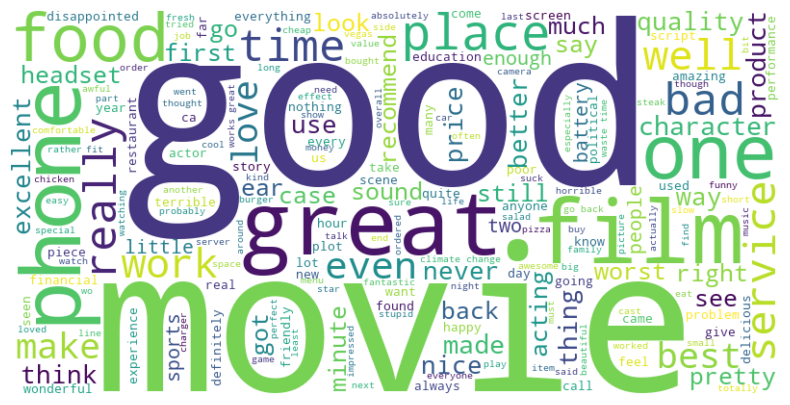

In [10]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('punkt')
nltk.download('stopwords')

# convert all words to lowercase
df['sentence']=df['sentence'].astype(str).str.lower()
text=" ".join(df['sentence'].dropna())
words=word_tokenize(text)

# Remove stopwords (common words like is, the, and)
filtered_words=[word for word in words if word.isalnum() and word not in stopwords.words('english')]

# Generate word cloud
wordcloud=WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()

Assumption: Based on this result we can assume that the texts from the given data are about the review of experience when watching movie. Now lets prove it by seeing 10 words that mostly written

In [11]:
# Listing top 10 words
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
# df = pd.read_csv('combined_sentiment_data.csv')

# Convert all sentences to lowercase and remove missing values
df['sentence'] = df['sentence'].astype(str).str.lower()

# Combine all sentences into one large text
text = " ".join(df['sentence'].dropna())

# Tokenize words
words = word_tokenize(text)

# Remove stopwords and non-alphanumeric words
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

# Count word occurrences
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Display results
print("Top 10 Most Frequently Occurring Words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\ProgramData\anaconda3\envs\roji2\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\ProgramData\anaconda3\envs\roji2\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Most Frequently Occurring Words:
good: 225
great: 209
movie: 180
phone: 165
film: 159
one: 146
food: 126
like: 123
place: 115
time: 111


based on this we can confirm that the sentence mainly talking about movie, but there are places, time and food words. So they might talk about watching in the Cinema

#### Step 3: Cleaning Data
Next step is to clean data. Before using the datas to implement them in the model, we need to remove the unnecessary characters such as punctuations and make the words to be the basic words to avoid having multiple words with the same meaning


In [264]:
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the text cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers using regex
    text = re.sub(r'\d+', '', text)

    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Join words back into a sentence
    return " ".join(lemmatized_words)

# Apply text cleaning function to the 'sentence' column
df['cleaned_sentence'] = df['sentence'].astype(str).apply(clean_text)

# Save cleaned data
df.to_csv('cleaned_sentiment_data.csv', index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\ProgramData\anaconda3\envs\roji2\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\ProgramData\anaconda3\envs\roji2\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\ProgramData\anaconda3\envs\roji2\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df_clean=pd.read_csv('cleaned_sentiment_data.csv')

In [182]:
df_clean.head()

,sentence,sentiment,word_count,sentence_count,count_noun,count_ner,cleaned_sentence
0,so there is no way for me to plug it in here i...,negative,22,1,3,1,way plug u unless go converter
1,"good case, excellent value.",positive,6,1,2,0,good case excellent value
2,great for the jawbone.,positive,5,1,1,0,great jawbone
3,tied to charger for conversations lasting more...,negative,13,2,4,1,tied charger conversation lasting minutesmajor...
4,the mic is great.,positive,5,1,1,0,mic great


### Step 4: Splitting data
Now its time to split the data to be test and training. But we have to use stratified splitting to keep the portion of sentiment (positive and negative) the same between original, test and training data

In [ ]:
!pip install scikit-learn pandas

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
# Ensure 'sentiment' column exists
if 'sentiment' not in df_clean.columns:
    raise ValueError("Dataset must contain a 'sentiment' column for stratified splitting.")

# Stratified split (80% Train, 20% Test) based on sentiment labels
train_df, test_df = train_test_split(df_clean, test_size=0.2, stratify=df_clean['sentiment'], random_state=42)

# # Separate features and labels
# X_train, y_train = train_df['cleaned_sentence'], train_df['sentiment']
# X_test, y_test = test_df['cleaned_sentence'], test_df['sentiment']

# Print the class distribution before and after splitting
print("Original Distribution:\n", df_clean['sentiment'].value_counts(normalize=True))
print("\nTrain Distribution:\n", train_df['sentiment'].value_counts(normalize=True))
print("\nTest Distribution:\n", test_df['sentiment'].value_counts(normalize=True))

# Save train and test data
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

Original Distribution:
 sentiment
positive    0.507404
negative    0.492596
Name: proportion, dtype: float64

Train Distribution:
 sentiment
positive    0.507367
negative    0.492633
Name: proportion, dtype: float64

Test Distribution:
 sentiment
positive    0.507553
negative    0.492447
Name: proportion, dtype: float64


In [184]:
# Separate features and labels
X_train, y_train = train_df['cleaned_sentence'], train_df['sentiment']
X_test, y_test = test_df['cleaned_sentence'], test_df['sentiment']

Now that we have splitted the data correctly, next we also need to transform the target data to be numerical so that we can put it in the model

In [186]:
# Convert labels to binary (0 = negative, 1 = positive) for y_test and y_train
y_train = y_train.map({'negative': 0, 'positive': 1}).astype(np.float32)
y_test = y_test.map({'negative': 0, 'positive': 1}).astype(np.float32)

# # Verify conversion
# print(y_train.head())
# print(y_test.head())


### Step 5: Transform data predictor to numerical
After transforming target to numerical now its time to transform all of the predictors to numerical there 3 ways of transformation that we can use and see which one giving best models

#### a. Implementing BoW feature engineering

In [240]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit on the training data and transform both train and test
X_train_bow = vectorizer.fit_transform(train_df['cleaned_sentence'])
X_test_bow = vectorizer.transform(test_df['cleaned_sentence'])

# Convert to DataFrame for readability
import pandas as pd
bow_train_df = pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_test_df = pd.DataFrame(X_test_bow.toarray(), columns=vectorizer.get_feature_names_out())
# # Save BoW features
bow_train_df.to_csv("BoW_train_features.csv", index=False)
bow_test_df.to_csv("BoW_test_features.csv", index=False)

#### b. Implementing TF-IDF Vectorizer feature engineering

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit on the training data and transform both train and test
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_sentence'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_sentence'])

# Convert to DataFrame
tfidf_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Save TF-IDF features
tfidf_train_df.to_csv("TF-IDF_train_features.csv", index=False)
tfidf_test_df.to_csv("TF-IDF_test_features.csv", index=False)

# print("TF-IDF Features (Train Set):\n", tfidf_train_df.head())


In [196]:
tfidf_train_df.head()

,aailiyah,abandoned,abhor,ability,able,abound,abovepretty,abroad,absolute,absolutel,...,yucky,yukon,yum,yummy,yun,za,zero,zillion,zombiestudents,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
# !pip install gensim

#### c. Implementing Word2Vec for feature engineering

In [242]:
import numpy as np
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize sentences into words
train_tokens = [word_tokenize(text) for text in train_df['cleaned_sentence']]
test_tokens = [word_tokenize(text) for text in test_df['cleaned_sentence']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert sentence to vector (average word embeddings)
def sentence_to_vector(sentence, model):
    words = word_tokenize(sentence)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return zero vector if no words found
    return np.mean(word_vectors, axis=0)

# Convert train & test sentences to vectors
X_train_w2v = np.array([sentence_to_vector(sent, word2vec_model) for sent in train_df['cleaned_sentence']])
X_test_w2v = np.array([sentence_to_vector(sent, word2vec_model) for sent in test_df['cleaned_sentence']])

In [243]:
print("Train sentence vector shape:", X_train_w2v.shape)
print("Test sentence vector shape:", X_test_w2v.shape)

Train sentence vector shape: (2647, 100)
Test sentence vector shape: (662, 100)


### Step 6: Model building and evaluation
Its time to build the model! But first we need to know which kind of evaluation we need to use to determine the best model

In [210]:
class_counts = df_clean['sentiment'].value_counts()
total_samples = len(df_clean['sentiment'])
class_percentages = (class_counts / total_samples) * 100
imbalance_ratio = class_percentages.max() / class_percentages.min()
imbalance_ratio
# If the imbalance ratio (max % / min %) is above 1.5, it's better to use F1-score instead of Accuracy.

1.0300613496932516

<BarContainer object of 2 artists>

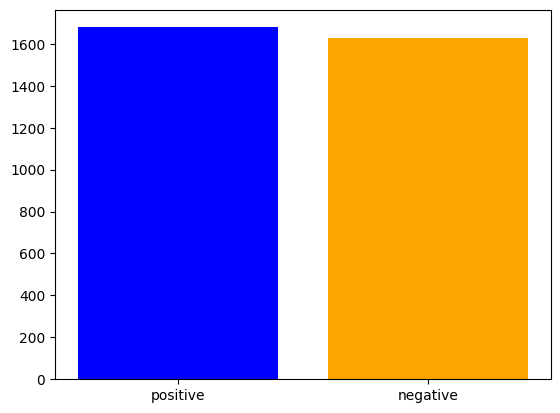

In [211]:
plt.bar(class_counts.index,class_counts.values,color=['blue','orange'])

The target data is balance so the choice of evaluation metric can be Accuracy or  AUC-ROC. I choose AUC-ROC over Accuracy here because I consider the predictive power to select the best model

In [232]:
import pandas as pd
import numpy as np
# Reload tf_idf splitt data CSV correctly
tfidf_train_df = pd.read_csv("TF-IDF_train_features.csv", header=0)  # Ensure header is properly set
tfidf_test_df = pd.read_csv("TF-IDF_test_features.csv", header=0)
# Reload Bow splitted data CSV correctly
bow_train_df = pd.read_csv("BoW_train_features.csv", header=0)  # Ensure header is properly set
bow_test_df = pd.read_csv("BoW_test_features.csv", header=0)

# Ensure all TF-IDF data is numeric
tfidf_train_array = tfidf_train_df.to_numpy(dtype=np.float32)
tfidf_test_array = tfidf_test_df.to_numpy(dtype=np.float32)

In [236]:
# Model and tuner
# !pip install keras-tuner
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Define the model builder function
def build_model(hp):
    model = Sequential([
        Dense(hp.Int('units_1', min_value=128, max_value=512, step=64), activation='relu', input_shape=(tfidf_train_df.shape[1],)),
        Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(hp.Int('units_2', min_value=128, max_value=512, step=64), activation='relu'),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc')])
    return model

# Use KerasTuner to search for the best hyperparameters
tuner = kt.Hyperband(build_model,
                     objective='val_auc',
                     max_epochs=20,
                     factor=3,
                     directory='my_tuner',
                     project_name='auc_tuning')

# Search for the best hyperparameters
tuner.search(tfidf_train_df, y_train, epochs=20, validation_data=(tfidf_test_df, y_test), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameters
print(f"Best Hyperparameters:\nUnits_1: {best_hps.get('units_1')}\n"
      f"Dropout_1: {best_hps.get('dropout_1')}\n"
      f"Units_2: {best_hps.get('units_2')}\n"
      f"Dropout_2: {best_hps.get('dropout_2')}\n"
      f"Learning Rate: {best_hps.get('learning_rate')}")

Reloading Tuner from my_tuner\auc_tuning\tuner0.json
Best Hyperparameters:
Units_1: 384
Dropout_1: 0.4
Units_2: 384
Dropout_2: 0.30000000000000004
Learning Rate: 0.001


In [237]:
# Step 1: Create a new model using the best hyperparameters
best_model = Sequential([
    Dense(best_hps.get('units_1'), activation='relu', input_shape=(tfidf_train_df.shape[1],)),
    Dropout(best_hps.get('dropout_1')),
    Dense(best_hps.get('units_2'), activation='relu'),
    Dropout(best_hps.get('dropout_2')),
    Dense(1, activation='sigmoid')
])

# Step 2: Compile the model with the best learning rate
best_model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                   loss='binary_crossentropy',
                   metrics=['accuracy', AUC(name='auc')])

# Step 3: Train the final model with the best hyperparameters
history = best_model.fit(tfidf_train_df, y_train, 
                         epochs=10, 
                         batch_size=32, 
                         validation_data=(tfidf_test_df, y_test))

# Step 4: Evaluate the model
y_pred_prob = best_model.predict(tfidf_test_df)
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"✅ Best Model AUC-ROC Score: {auc_roc:.4f}")


C:\ProgramData\anaconda3\envs\roji2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5649 - auc: 0.6252 - loss: 0.6760 - val_accuracy: 0.7704 - val_auc: 0.8550 - val_loss: 0.4828
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9070 - auc: 0.9574 - loss: 0.2854 - val_accuracy: 0.7840 - val_auc: 0.8740 - val_loss: 0.5362
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9715 - auc: 0.9919 - loss: 0.1034 - val_accuracy: 0.7931 - val_auc: 0.8729 - val_loss: 0.5666
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9862 - auc: 0.9980 - loss: 0.0526 - val_accuracy: 0.7900 - val_auc: 0.8672 - val_loss: 0.6598
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9921 - auc: 0.9994 - loss: 0.0258 - val_accuracy: 0.7885 - val_auc: 0.8622 - val_loss: 0.6996
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9972 - auc: 0.9999 - loss: 0.0144 - val_accuracy: 0.7931 - val_auc: 0.8570 - val_loss: 0.8161
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/

In [239]:
y_pred_prob = best_model.predict(tfidf_test_df)
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"✅ Best Model AUC-ROC Score: {auc_roc:.4f}")
# 0.8668

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
✅ Best Model AUC-ROC Score: 0.8661


Model for bag of words

In [244]:
# Define the model builder function
def build_model(hp):
    model = Sequential([
        Dense(hp.Int('units_1', min_value=128, max_value=512, step=64), activation='relu', input_shape=(bow_train_df.shape[1],)),
        Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(hp.Int('units_2', min_value=128, max_value=512, step=64), activation='relu'),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc')])
    return model

# Use KerasTuner to search for the best hyperparameters
tuner = kt.Hyperband(build_model,
                     objective='val_auc',
                     max_epochs=20,
                     factor=3,
                     directory='my_tuner',
                     project_name='auc_tuning')

# Search for the best hyperparameters
tuner.search(bow_train_df, y_train, epochs=20, validation_data=(bow_test_df, y_test), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameters
print(f"Best Hyperparameters:\nUnits_1: {best_hps.get('units_1')}\n"
      f"Dropout_1: {best_hps.get('dropout_1')}\n"
      f"Units_2: {best_hps.get('units_2')}\n"
      f"Dropout_2: {best_hps.get('dropout_2')}\n"
      f"Learning Rate: {best_hps.get('learning_rate')}")

Reloading Tuner from my_tuner\auc_tuning\tuner0.json
Best Hyperparameters:
Units_1: 384
Dropout_1: 0.4
Units_2: 384
Dropout_2: 0.30000000000000004
Learning Rate: 0.001


model for word 2 vec

In [267]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_auc_score

def run_model_pipeline(X_train, X_test, y_train, y_test, input_name):
    # Model Builder
    def build_model(hp):
        model = Sequential([
            Dense(hp.Int('units_1', 128, 512, 64), activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(hp.Float('dropout_1', 0.2, 0.5, 0.1)),
            Dense(hp.Int('units_2', 128, 512, 64), activation='relu'),
            Dropout(hp.Float('dropout_2', 0.2, 0.5, 0.1)),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                      loss='binary_crossentropy',
                      metrics=['accuracy', AUC(name='auc')])
        return model

    # Tuner setup
    tuner = kt.Hyperband(build_model, objective='val_auc', max_epochs=20, factor=3, directory='tuner_dir', project_name=f'{input_name}_auc_tuning')
    tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

    # Get best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"\n✅ Best Hyperparameters for {input_name}:")
    for param in ['units_1', 'dropout_1', 'units_2', 'dropout_2', 'learning_rate']:
        print(f"{param}: {best_hps.get(param)}")

    # Build the best model
    model = Sequential([
        Dense(best_hps.get('units_1'), activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(best_hps.get('dropout_1')),
        Dense(best_hps.get('units_2'), activation='relu'),
        Dropout(best_hps.get('dropout_2')),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(best_hps.get('learning_rate')), loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate AUC-ROC
    y_pred_prob = model.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    print(f"✅ Final AUC-ROC for {input_name}: {auc_roc:.4f}\n")

    return model, auc_roc


In [269]:
# TF-IDF version
tfidf_model, tfidf_auc = run_model_pipeline(tfidf_train_df, tfidf_test_df, y_train, y_test, 'TFIDF')

# BoW version
bow_model, bow_auc = run_model_pipeline(bow_train_df, bow_test_df, y_train, y_test, 'BOW')

# Word2Vec version
w2v_model, w2v_auc = run_model_pipeline(X_train_w2v, X_test_w2v, y_train, y_test, 'Word2Vec')


Reloading Tuner from tuner_dir\TFIDF_auc_tuning\tuner0.json

✅ Best Hyperparameters for TFIDF:
units_1: 384
dropout_1: 0.4
units_2: 384
dropout_2: 0.30000000000000004
learning_rate: 0.0001


C:\ProgramData\anaconda3\envs\roji2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.5352 - auc: 0.5461 - loss: 0.6923 - val_accuracy: 0.6284 - val_auc: 0.6815 - val_loss: 0.6902
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6689 - auc: 0.7169 - loss: 0.6877 - val_accuracy: 0.7221 - val_auc: 0.7791 - val_loss: 0.6843
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7798 - auc: 0.8776 - loss: 0.6745 - val_accuracy: 0.7704 - val_auc: 0.8335 - val_loss: 0.6662
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8651 - auc: 0.9407 - loss: 0.6393 - val_accuracy: 0.7855 - val_auc: 0.8509 - val_loss: 0.6158
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9158 - auc: 0.9616 - loss: 0.5401 - val_accuracy: 0.7885 - val_auc: 0.8588 - val_loss: 0.5316
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9341 - auc: 0.9752 - loss: 0.3842 - val_accuracy: 0.7885 - val_auc: 0.8648 - val_loss: 0.4774
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms

C:\ProgramData\anaconda3\envs\roji2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.5132 - auc: 0.5428 - loss: 0.6913 - val_accuracy: 0.6042 - val_auc: 0.7077 - val_loss: 0.6861
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6580 - auc: 0.7590 - loss: 0.6775 - val_accuracy: 0.6662 - val_auc: 0.7875 - val_loss: 0.6734
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7858 - auc: 0.8818 - loss: 0.6494 - val_accuracy: 0.7326 - val_auc: 0.8232 - val_loss: 0.6423
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8639 - auc: 0.9339 - loss: 0.5870 - val_accuracy: 0.7462 - val_auc: 0.8407 - val_loss: 0.5819
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9047 - auc: 0.9607 - loss: 0.4626 - val_accuracy: 0.7825 - val_auc: 0.8539 - val_loss: 0.5120
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9258 - auc: 0.9720 - loss: 0.3314 - val_accuracy: 0.7961 - val_auc: 0.8643 - val_loss: 0.4709
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30m

C:\ProgramData\anaconda3\envs\roji2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5016 - auc: 0.4879 - loss: 0.6931 - val_accuracy: 0.5227 - val_auc: 0.6157 - val_loss: 0.6911
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5503 - auc: 0.5708 - loss: 0.6899 - val_accuracy: 0.5906 - val_auc: 0.6394 - val_loss: 0.6816
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5383 - auc: 0.5711 - loss: 0.6842 - val_accuracy: 0.5937 - val_auc: 0.6461 - val_loss: 0.6658
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5984 - auc: 0.6354 - loss: 0.6635 - val_accuracy: 0.5589 - val_auc: 0.6569 - val_loss: 0.6719
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5962 - auc: 0.6421 - loss: 0.6574 - val_accuracy: 0.5876 - val_auc: 0.6626 - val_loss: 0.6478
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6247 - auc: 0.6879 - loss: 0.6310 - val_accuracy: 0.6088 - val_auc: 0.6646 - val_loss: 0.6445
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

In [270]:
print(f"\n🔎 Final Comparison of AUC-ROC:")
print(f"TF-IDF AUC-ROC: {tfidf_auc:.4f}")
print(f"BoW AUC-ROC   : {bow_auc:.4f}")
print(f"Word2Vec AUC-ROC: {w2v_auc:.4f}")


🔎 Final Comparison of AUC-ROC:
TF-IDF AUC-ROC: 0.8756
BoW AUC-ROC   : 0.8759
Word2Vec AUC-ROC: 0.6790


### Step 7: Prediction and Confusion metrix

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step  
Confusion Matrix:
[[243  83]
 [ 46 290]]


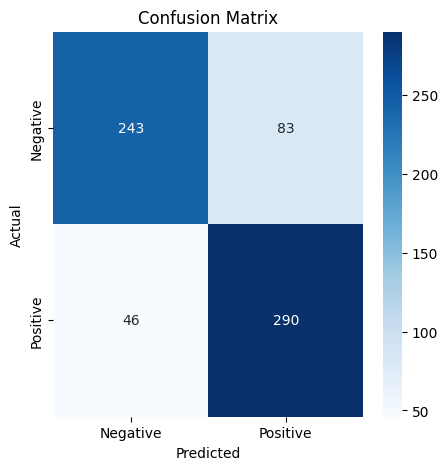

In [272]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob = bow_model.predict(bow_test_df)
# Convert probability scores to binary predictions (0 or 1)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Threshold of 0.5

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


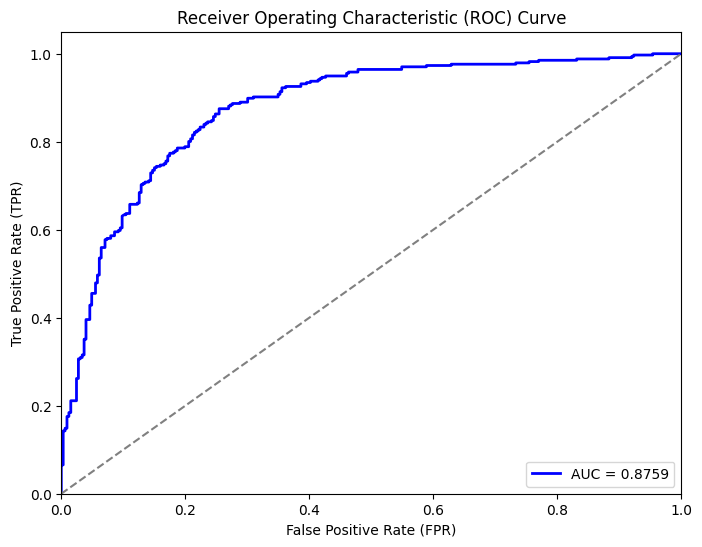

In [273]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
